<a href="https://colab.research.google.com/github/swastikbanerjee/DL_Lab/blob/main/dlLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras import layers
from keras import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score,auc

In [ ]:
data = pd.read_csv("/content/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**EXPLORATORY DATA ANALYSIS**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.shape

(284807, 31)

In [ ]:
# Making a copy of dataframe for EDA
df_eda = data.copy()
df_eda["Hours"] = round(data['Time']/3600)

In [ ]:
# Pie chart
colors = ['#FF5851', '#3d9dfc']
fig = go.Figure(data=[go.Pie(labels=["Non Fraud", "Fraud"], values=df_eda['Class'].value_counts(), pull=[0, 0.2])])
fig.update_layout(title_text="Fraud-Non Fraud (Class) Distribution")
fig.update_traces(marker=dict(colors=[colors[1], colors[0]]))
fig.show()

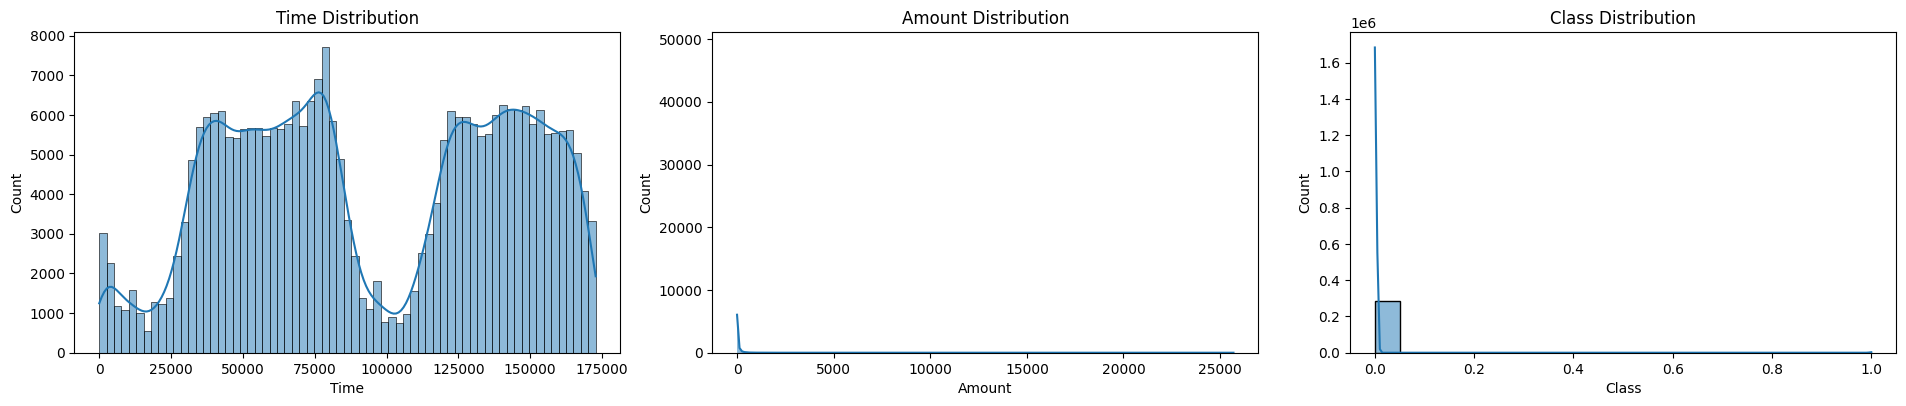

In [ ]:
fig,axs=plt.subplots(1,3,figsize=(19,4))
sns.histplot(data["Time"],ax=axs[0],kde=True)
axs[0].set_title("Time Distribution")

sns.histplot(data["Amount"],ax=axs[1],kde=True)
axs[1].set_title("Amount Distribution")

sns.histplot(data["Class"],ax=axs[2],kde=True)
axs[2].set_title("Class Distribution")
plt.tight_layout(pad=.5)
plt.show()

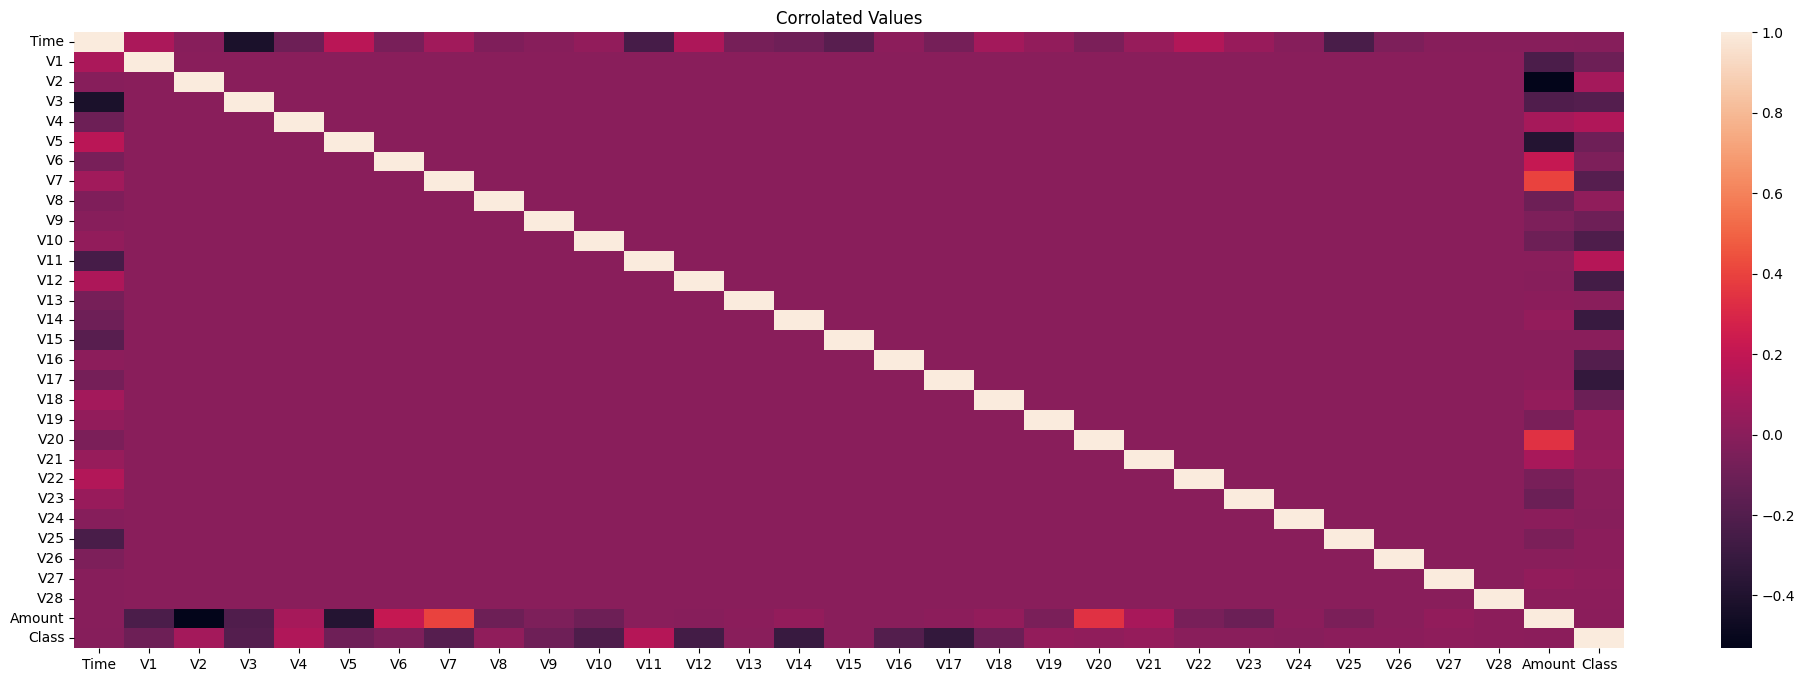

In [ ]:
sns.color_palette(palette="husl",n_colors=10)
plt.figure(figsize=(25,8))
sns.heatmap(data=data.corr())
plt.title("Corrolated Values")
plt.show()

V3,V5,V17,V18 Are Negatively Corrolated

V2,V4,V11,V19 Are Positively Corrolated

**DATA PREPROCESSING**

In [ ]:
data.sort_values(by='Class', ascending=False, inplace=True) #easier for stratified sampling
data.drop('Time', axis=1,  inplace = True)

In [ ]:
df_sample = data.iloc[:3000,:]
df_sample.Class.value_counts()

0    2508
1     492
Name: Class, dtype: int64

In [ ]:
feature = np.array(df_sample.values[:,0:29])
label = np.array(df_sample.values[:,-1])

In [ ]:
from sklearn.utils import shuffle

shuffle_df = shuffle(df_sample, random_state=42)

x = shuffle_df[0:2400]
y = shuffle_df[2400:]

**Scaling Numerical Features**

In [ ]:
train_feature = np.array(x.values[:,0:29])
train_label = np.array(x.values[:,-1])
test_feature = np.array(y.values[:,0:29])
test_label = np.array(y.values[:,-1])

In [ ]:
scaler = StandardScaler()
scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

**Checking for Missing Values**

In [ ]:
data.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data = data.dropna()
data.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**ENCODING CATEGORICAL VALUES**

Since our dataset doesn't have any object data type, we cannot encode any categorical values

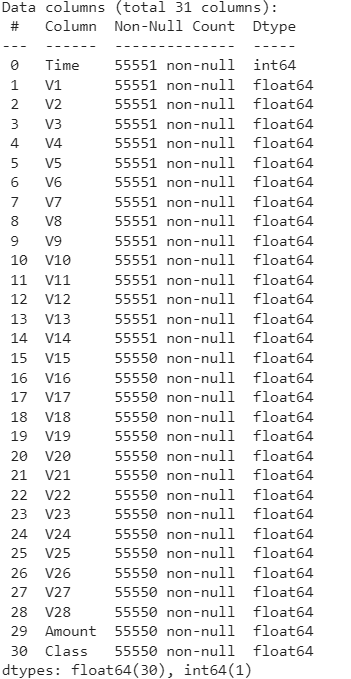

**SPLITTING THE DATASET INTO TRAINING AND TESTING SETS**

In [ ]:
#train_feature = np.array(x.values[:,0:29])
#train_label = np.array(x.values[:,-1])
#test_feature = np.array(y.values[:,0:29])
#test_label = np.array(y.values[:,-1])

**MODEL DEVELOPMENT**

In [ ]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

The simplest model is defined in the Sequential class, which is a linear stack of Layers. You can create a Sequential model and define all the layers in the constructor.

**Kernel Initializer**

The type of initialization used for a layer is specified in the kernel_initializer argument. Some common types of layer initialization include:

1. random_uniform: Weights are initialized to small uniformly random values between -0.05 and 0.05.
2.  random_normal: Weights are initialized to small Gaussian random values (zero mean and standard deviation of 0.05).
3. zeros: All weights are set to zero values.

**Activation Function**

Keras supports a range of standard neuron activation functions, such as softmax, rectified linear (relu), tanh, and sigmoid.

**Layer Types**

There are a large number of core layer types for standard neural networks. Some common and useful layer types you can choose from are:

1. Dense: Fully connected layer and the most common type of layer used on multi-layer perceptron models
2. Dropout: Apply dropout to the model, setting a fraction of inputs to zero in an effort to reduce overfitting
3. Concatenate: Combine the outputs from multiple layers as input to a single layer

Model Compilation

Once you have defined your model, it needs to be compiled. This creates the efficient structures used by TensorFlow in order to efficiently execute your model during training. Specifically, TensorFlow converts your model into a graph so the training can be carried out efficiently.

You compile your model using the compile() function, and it accepts three important attributes:

1. Model optimizer:

The optimizer is the search technique used to update weights in your model. You can create an optimizer object and pass it to the compile function via the optimizer argument. This allows you to configure the optimization procedure with its own arguments, such as learning rate.
Some popular gradient descent optimizers you might want to choose from include:

*  SGD: stochastic gradient descent, with support for momentum
*  RMSprop: adaptive learning rate optimization method proposed by Geoff Hinton
*  Adam: Adaptive Moment Estimation (Adam) that also uses adaptive learning rates

2. Loss function:

The loss function, also called the objective function, is the evaluation of the model used by the optimizer to navigate the weight space. You can specify the name of the loss function to use in the compile function by the loss argument. Some common examples include:

*   ‘mse‘: for mean squared error
*   ‘binary_crossentropy‘: for binary logarithmic loss (logloss)
*   ‘categorical_crossentropy‘: for multi-class logarithmic loss (logloss)


3. Metrics:

Metrics are evaluated by the model during training. Only one metric is supported at the moment, and that is accuracy.

**Model Training**

Training both specifies the number of epochs to train on and the batch size.
*  Epochs (epochs) refer to the number of times the model is exposed to the training dataset.
*   Batch Size (batch_size) is the number of training instances shown to the model before a weight update is performed.


**Model Prediction**
Once you have trained your model, you can use it to make predictions on test data or new data. There are a number of different output types you can calculate from your trained model, each calculated using a different function call on your model object.

**USING ADAM OPTIMIZER**


Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

In [ ]:
model = Sequential()
model.add(Dense(units=200, input_dim=29, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=200,  kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 200)               6000      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 200)               40200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 201       
                                                                 
Total params: 46401 (181.25 KB)
Trainable params: 46401 (181.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


**MODEL TRAINING**

In [ ]:
model.compile(loss='binary_crossentropy',  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
train_history = model.fit(x= train_feature_trans, y=train_label,  validation_split=0.8, epochs=200,  batch_size=500, verbose=2)

Epoch 1/200
1/1 - 1s - loss: 0.6943 - accuracy: 0.5198 - val_loss: 0.6008 - val_accuracy: 0.8891 - 1s/epoch - 1s/step
Epoch 2/200
1/1 - 0s - loss: 0.6083 - accuracy: 0.8643 - val_loss: 0.3898 - val_accuracy: 0.9578 - 57ms/epoch - 57ms/step
Epoch 3/200
1/1 - 0s - loss: 0.3968 - accuracy: 0.9562 - val_loss: 0.1976 - val_accuracy: 0.9625 - 60ms/epoch - 60ms/step
Epoch 4/200
1/1 - 0s - loss: 0.2002 - accuracy: 0.9624 - val_loss: 0.1576 - val_accuracy: 0.9630 - 46ms/epoch - 46ms/step
Epoch 5/200
1/1 - 0s - loss: 0.1524 - accuracy: 0.9624 - val_loss: 0.1838 - val_accuracy: 0.9630 - 57ms/epoch - 57ms/step
Epoch 6/200
1/1 - 0s - loss: 0.1462 - accuracy: 0.9645 - val_loss: 0.2015 - val_accuracy: 0.9625 - 56ms/epoch - 56ms/step
Epoch 7/200
1/1 - 0s - loss: 0.1359 - accuracy: 0.9729 - val_loss: 0.2035 - val_accuracy: 0.9646 - 54ms/epoch - 54ms/step
Epoch 8/200
1/1 - 0s - loss: 0.1084 - accuracy: 0.9791 - val_loss: 0.1979 - val_accuracy: 0.9651 - 47ms/epoch - 47ms/step
Epoch 9/200
1/1 - 0s - loss:

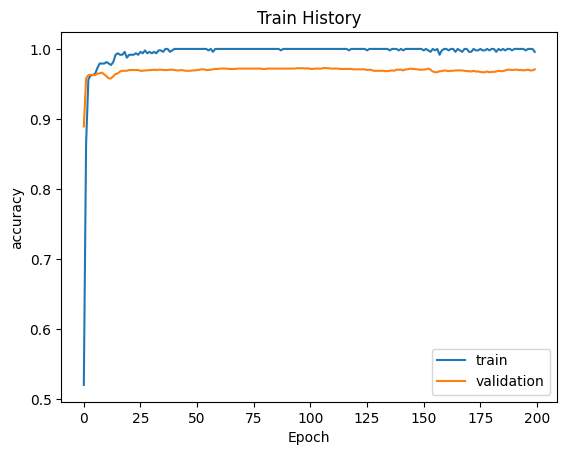

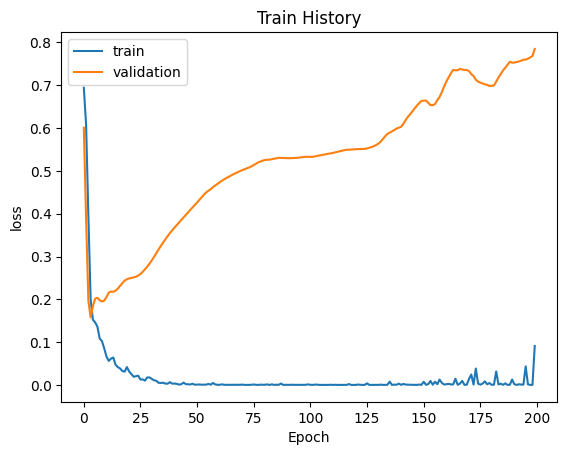

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [ ]:
scores = model.evaluate(test_feature_trans, test_label)
print('\n')
print('accuracy=',scores[1])

19/19 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.9783


accuracy= 0.9783333539962769


In [ ]:
predictions = (model.predict(test_feature_trans) > 0.5).astype("int32")

19/19 [==============================] - 0s 3ms/step


In [ ]:
df_ans = pd.DataFrame({'Real Class' :test_label})
df_ans['Prediction'] = predictions
df_ans[ df_ans['Real Class'] != df_ans['Prediction'] ]

,Real Class,Prediction
110,1.0,0
163,0.0,1
224,1.0,0
265,0.0,1
283,0.0,1
308,1.0,0
345,1.0,0
357,1.0,0
378,1.0,0
484,0.0,1


In [ ]:
print(classification_report(predictions,test_label))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       520
           1       0.91      0.93      0.92        80

    accuracy                           0.98       600
   macro avg       0.95      0.96      0.95       600
weighted avg       0.98      0.98      0.98       600



In [ ]:
roc_auc = roc_auc_score(predictions,test_label)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.9557692307692308


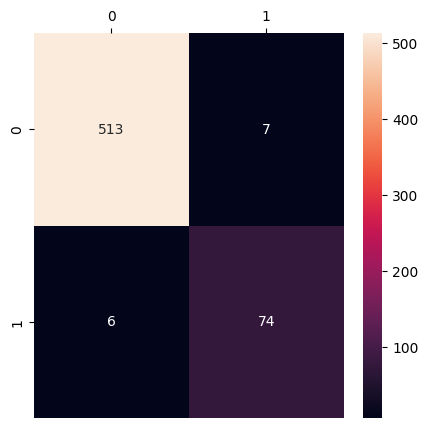

In [ ]:
conf = confusion_matrix(predictions,test_label)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d')
ax.xaxis.set_ticks_position('top')

Precision-Recall AUC Score: 0.9242901234567902


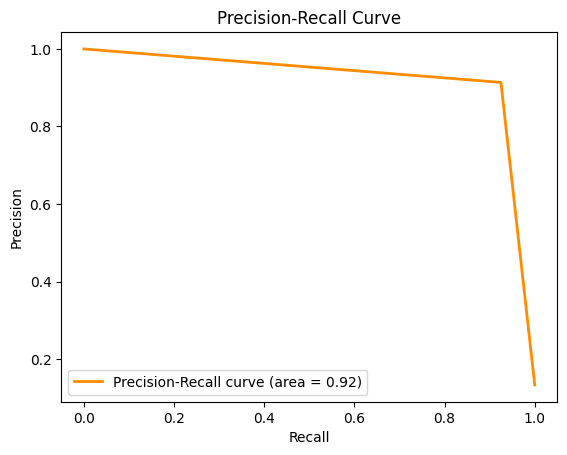

In [ ]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(predictions,test_label)

# Calculate area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC Score: {pr_auc}")

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

**USING AdaDELTA**

Adadelta optimization is a stochastic gradient descent method that is based on adaptive learning rate per dimension to address two drawbacks:

*   The continual decay of learning rates throughout training.
*   The need for a manually selected global learning rate.



In [ ]:
model2 = Sequential()
model2.add(Dense(units=200, input_dim=29, kernel_initializer='uniform', activation='relu'))
model2.add(Dense(units=200,  kernel_initializer='uniform', activation='relu'))
model2.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               6000      
                                                                 
 dense_7 (Dense)             (None, 200)               40200     
                                                                 
 dense_8 (Dense)             (None, 1)                 201       
                                                                 
Total params: 46401 (181.25 KB)
Trainable params: 46401 (181.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model2.compile(loss='binary_crossentropy',  optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.01), metrics=['accuracy'])
train_history = model2.fit(x=train_feature_trans, y=train_label,  validation_split=0.8, epochs=200,  batch_size=500, verbose=2)

Epoch 1/200
1/1 - 2s - loss: 0.6962 - accuracy: 0.2067 - val_loss: 0.6963 - val_accuracy: 0.1838 - 2s/epoch - 2s/step
Epoch 2/200
1/1 - 0s - loss: 0.6961 - accuracy: 0.2150 - val_loss: 0.6962 - val_accuracy: 0.1900 - 72ms/epoch - 72ms/step
Epoch 3/200
1/1 - 0s - loss: 0.6960 - accuracy: 0.2213 - val_loss: 0.6961 - val_accuracy: 0.1910 - 83ms/epoch - 83ms/step
Epoch 4/200
1/1 - 0s - loss: 0.6960 - accuracy: 0.2255 - val_loss: 0.6961 - val_accuracy: 0.1942 - 73ms/epoch - 73ms/step
Epoch 5/200
1/1 - 0s - loss: 0.6959 - accuracy: 0.2296 - val_loss: 0.6960 - val_accuracy: 0.1983 - 120ms/epoch - 120ms/step
Epoch 6/200
1/1 - 0s - loss: 0.6958 - accuracy: 0.2338 - val_loss: 0.6959 - val_accuracy: 0.2020 - 108ms/epoch - 108ms/step
Epoch 7/200
1/1 - 0s - loss: 0.6958 - accuracy: 0.2359 - val_loss: 0.6959 - val_accuracy: 0.2046 - 84ms/epoch - 84ms/step
Epoch 8/200
1/1 - 0s - loss: 0.6957 - accuracy: 0.2380 - val_loss: 0.6958 - val_accuracy: 0.2098 - 78ms/epoch - 78ms/step
Epoch 9/200
1/1 - 0s - l

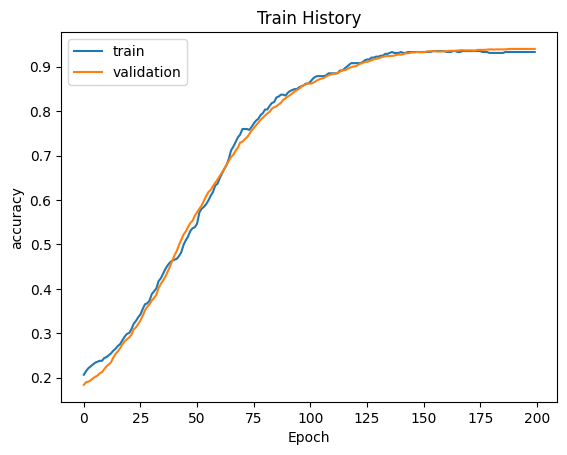

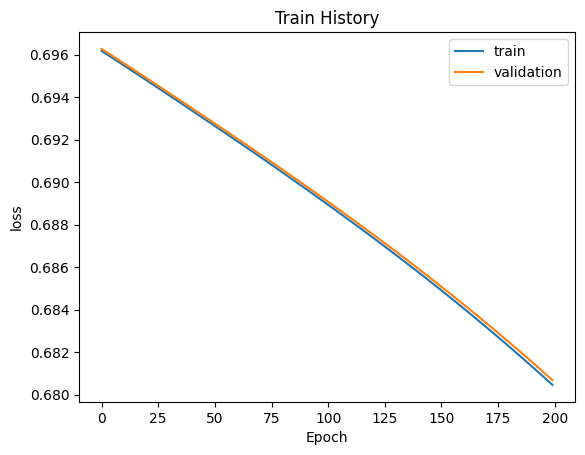

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [ ]:
scores = model2.evaluate(test_feature_trans, test_label)
print('\n')
print('accuracy=',scores[1])

19/19 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.9583


accuracy= 0.9583333134651184


In [ ]:
predictions = (model2.predict(test_feature_trans) > 0.5).astype("int32")

19/19 [==============================] - 0s 4ms/step


In [ ]:
print(classification_report(predictions,test_label))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       542
           1       0.70      0.98      0.82        58

    accuracy                           0.96       600
   macro avg       0.85      0.97      0.90       600
weighted avg       0.97      0.96      0.96       600



In [ ]:
roc_auc = roc_auc_score(predictions,test_label)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.9692390889426137


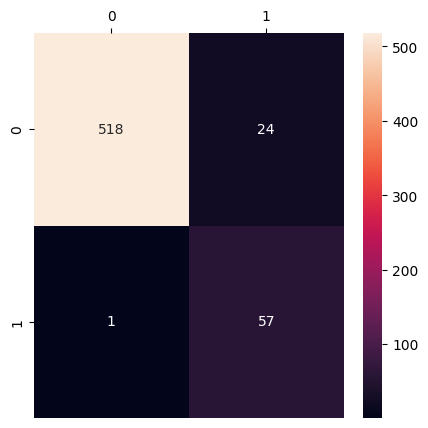

In [ ]:
conf = confusion_matrix(predictions,test_label)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d')
ax.xaxis.set_ticks_position('top')

Precision-Recall AUC Score: 0.8440644955300127


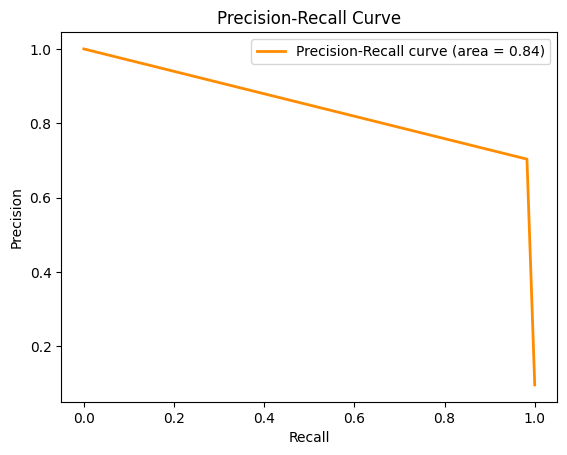

In [ ]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(predictions,test_label)

# Calculate area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC Score: {pr_auc}")

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()